# Your name: Kassie - Xinyu Xie
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [1]:
#import packages 

#start by importing pandas, matplotlib, numpy and seaborn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns



# Data File Reading Section
## Write code to read in data from external sources here

In [2]:
#read datasets
india_csv = pd.read_csv('data.csv',encoding='cp1252') #working on Windows 


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#display first few rows with head()
india_csv.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
#specify to 10 rows 
india_csv.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [5]:
#get statistical descripotion 
india_csv.describe().round(2)

,so2,no2,rspm,spm,pm2_5
count,401096.00,419509.00,395520.00,198355.00,9314.00
mean,10.83,25.81,108.83,220.78,40.79
std,11.18,18.50,74.87,151.40,30.83
min,0.00,0.00,0.00,0.00,3.00
25%,5.00,14.00,56.00,111.00,24.00
50%,8.00,22.00,90.00,187.00,32.00
75%,13.70,32.20,142.00,296.00,46.00
max,909.00,876.00,6307.03,3380.00,504.00


In [6]:
#display number of total rows and columns 
india_csv.shape

(435742, 13)

In [7]:
#display number of non-null values for each column
india_csv.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [8]:
#display number of null value for each column 
india_csv.isnull().sum()
    #most num of null: pm2_5, least num of null: state

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [9]:
#display information of dataset 
india_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [10]:
#display top 10 records
india_csv.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [11]:
#display bottom 10 records
india_csv.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [12]:
# Cleaning up the data

#dropping columns that aren't required
    #i think it's a typo as 'location_monitoring_agency', 
    #so I will drop 'location_monitoring_station' in stead
india_csv.drop(['stn_code', 
                'agency', 
                'sampling_date', 
                'location_monitoring_station'], axis=1, inplace=True)
india_csv.info() #make sure columns have been dropped 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


In [13]:
#dropping rows where no date is available
#india_csv.isnull().sum() -> 7 null in 'date' 
india_csv = india_csv[india_csv['date'].notna()]

india_csv.isnull().sum() #make sure row dropped 

state            0
location         0
type          5390
so2          34643
no2          16230
rspm         40219
spm         237380
pm2_5       426421
date             0
dtype: int64

In [14]:
# displaying final columns (data.columns)
india_csv.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [15]:
#Replace the 'type' values with standard codes
types = {"Residential": "R", 
         "Residential and others": "RO", 
         "Residential, Rural and other Areas": "RRO", 
         "Industrial Area": "I", "Industrial Areas": "I", 
         "Industrial": "I", 
         "Sensitive Area": "S", 
         "Sensitive Areas": "S", 
         "Sensitive": "S", 
         np.nan: "RRO" }

india_csv.type = india_csv.type.replace(types)


In [16]:
# Display top 10 records after codification of 'types'

#make sure it's been replaced correctly 
india_csv.head(10)


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [17]:
#Create a new column holding year values

#check for the date format 
india_csv.head() #date: 1990-02-01 '%Y-%m-%d'

#convert the column to 'datetime' type and extract the year to populate the new column
india_csv['date'] =  pd.to_datetime(india_csv['date'], format='%Y-%m-%d')
india_csv['year'] = pd.DatetimeIndex(india_csv['date']).year


In [18]:
#display Top 5 records after the conversion.
india_csv.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [19]:
#define columns of importance, which shall be used reguarly 
    #(COLS =SO2, NO2, rspm, spm, pm2_5 )

#invoke SimpleImputer 
from sklearn.impute import SimpleImputer

#fill missing values in every col using 'mean' 
india_csv.info() #check for information 

cols = ['so2','no2', 'rspm', 'spm', 'pm2_5']
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute = impute.fit(india_csv[cols])
india_csv[cols] = impute.transform(india_csv[cols])

#another way of doing this: (more complicated)
##create two df using the important col and rest col
#cols = india_csv[['so2','no2', 'rspm', 'spm', 'pm2_5']]
#other = india_csv[['state', 'location', 'type', 'date', 'year']]

##use imputer on important col 
#impute = SimpleImputer(missing_values=np.nan, strategy='mean')
#cols = pd.DataFrame(impute.fit_transform(cols),
#                    columns = cols.columns) 

##concat two df together to a new df 
#india2 = pd.concat([cols, other], axis = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435735 non-null  object        
 1   location  435735 non-null  object        
 2   type      435735 non-null  object        
 3   so2       401092 non-null  float64       
 4   no2       419505 non-null  float64       
 5   rspm      395516 non-null  float64       
 6   spm       198355 non-null  float64       
 7   pm2_5     9314 non-null    float64       
 8   date      435735 non-null  datetime64[ns]
 9   year      435735 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 36.6+ MB


In [20]:
# Display data.info after the transformation
india_csv.info()
    #all 435735 non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435735 non-null  object        
 1   location  435735 non-null  object        
 2   type      435735 non-null  object        
 3   so2       435735 non-null  float64       
 4   no2       435735 non-null  float64       
 5   rspm      435735 non-null  float64       
 6   spm       435735 non-null  float64       
 7   pm2_5     435735 non-null  float64       
 8   date      435735 non-null  datetime64[ns]
 9   year      435735 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 36.6+ MB


In [21]:
# Display that there are no more missing values in the dataset
india_csv.shape #num of rows = non-null -> no more missing values 

(435735, 10)

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [22]:
#group data based on states 
    #median for SO2 
    #sort it 
    #states with higher and lower level SO2
india_csv.groupby('state').so2.mean().sort_values() 
india_csv.groupby('state').so2.mean().sort_values(ascending = False)

state
Uttaranchal             23.724521
Jharkhand               23.235550
Sikkim                  19.800000
Bihar                   18.825123
Uttarakhand             18.571547
Maharashtra             17.143809
Gujarat                 16.631424
Haryana                 13.799114
Chhattisgarh            12.717300
West Bengal             12.517751
Uttar Pradesh           12.428221
Puducherry              11.912749
Madhya Pradesh          11.485318
Tamil Nadu              11.298839
Punjab                  10.636676
Karnataka               10.257597
Meghalaya                9.203895
Dadra & Nagar Haveli     8.954491
Delhi                    8.918572
Manipur                  8.550011
Daman & Diu              8.196329
Rajasthan                7.699848
Goa                      7.514605
Andhra Pradesh           7.377196
Jammu & Kashmir          7.239967
Assam                    6.751470
Chandigarh               6.601066
Odisha                   6.198968
Kerala                   5.842146
Telangan

state
Mizoram                  3.695306
Himachal Pradesh         4.914030
Arunachal Pradesh        5.134187
Nagaland                 5.160995
Telangana                5.460775
Kerala                   5.842146
Odisha                   6.198968
Chandigarh               6.601066
Assam                    6.751470
Jammu & Kashmir          7.239967
Andhra Pradesh           7.377196
Goa                      7.514605
Rajasthan                7.699848
Daman & Diu              8.196329
Manipur                  8.550011
Delhi                    8.918572
Dadra & Nagar Haveli     8.954491
Meghalaya                9.203895
Karnataka               10.257597
Punjab                  10.636676
Tamil Nadu              11.298839
Madhya Pradesh          11.485318
Puducherry              11.912749
Uttar Pradesh           12.428221
West Bengal             12.517751
Chhattisgarh            12.717300
Haryana                 13.799114
Gujarat                 16.631424
Maharashtra             17.143809
Uttarakh

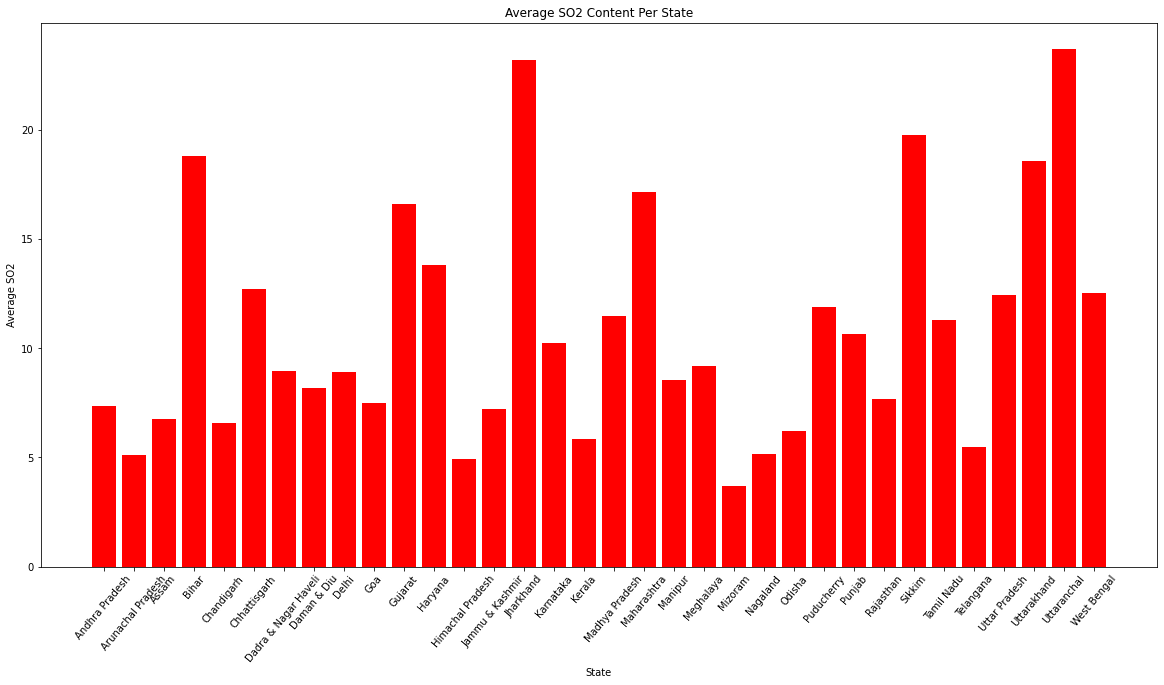

In [23]:
%matplotlib inline 
#in case running errors 

#graphic visualization with values sorted in ascending order 
#(a) as table 
table = india_csv.groupby('state').so2.mean().sort_values() #same as above 
print(table)

#(b) bar chart
stateso2 = india_csv.groupby(['state'])['so2'].mean()
plt.figure(figsize=(20,10))
plt.xlabel('State')
plt.ylabel('Average SO2')
plt.title('Average SO2 Content Per State')
plt.bar(stateso2.index, stateso2, color = 'red')
plt.xticks(rotation = 50)
plt.show()

##Observation: 



1.   There are two states that have super high level of sulphur dioxide content in the air: Uttarakhand and Jharkhand.
2.   The state that have the lowest level of sulphur dioxide content is Mizoram. 
3.   The general level of sulphur dioxide in the air for each state in India is range from 8 μg/m3 to 15 μg/m3.





### no2 status

In [24]:
#group data based on states 
    #median for NO2 
    #sort it 
    #states with higher and lower level NO2
india_csv.groupby('state').no2.mean().sort_values() 
india_csv.groupby('state').no2.mean().sort_values(ascending = False)

state
West Bengal             58.852111
Delhi                   51.728225
Jharkhand               42.975081
Bihar                   36.173284
Maharashtra             31.988249
Rajasthan               30.375852
Punjab                  28.044734
Uttar Pradesh           27.548281
Uttaranchal             27.068046
Sikkim                  26.800000
Uttarakhand             26.454148
Chhattisgarh            24.858597
Gujarat                 24.069319
Telangana               23.880145
Haryana                 23.711705
Karnataka               22.782283
Andhra Pradesh          21.790235
Tamil Nadu              21.727065
Manipur                 20.173684
Chandigarh              19.407632
Madhya Pradesh          19.313769
Dadra & Nagar Haveli    18.353231
Odisha                  17.025434
Daman & Diu             16.168926
Puducherry              15.891553
Kerala                  15.052342
Himachal Pradesh        14.848523
Assam                   14.838640
Goa                     13.462393
Jammu & 

state
Mizoram                  8.531138
Nagaland                10.467140
Arunachal Pradesh       10.893687
Meghalaya               11.843235
Jammu & Kashmir         12.445239
Goa                     13.462393
Assam                   14.838640
Himachal Pradesh        14.848523
Kerala                  15.052342
Puducherry              15.891553
Daman & Diu             16.168926
Odisha                  17.025434
Dadra & Nagar Haveli    18.353231
Madhya Pradesh          19.313769
Chandigarh              19.407632
Manipur                 20.173684
Tamil Nadu              21.727065
Andhra Pradesh          21.790235
Karnataka               22.782283
Haryana                 23.711705
Telangana               23.880145
Gujarat                 24.069319
Chhattisgarh            24.858597
Uttarakhand             26.454148
Sikkim                  26.800000
Uttaranchal             27.068046
Uttar Pradesh           27.548281
Punjab                  28.044734
Rajasthan               30.375852
Maharash

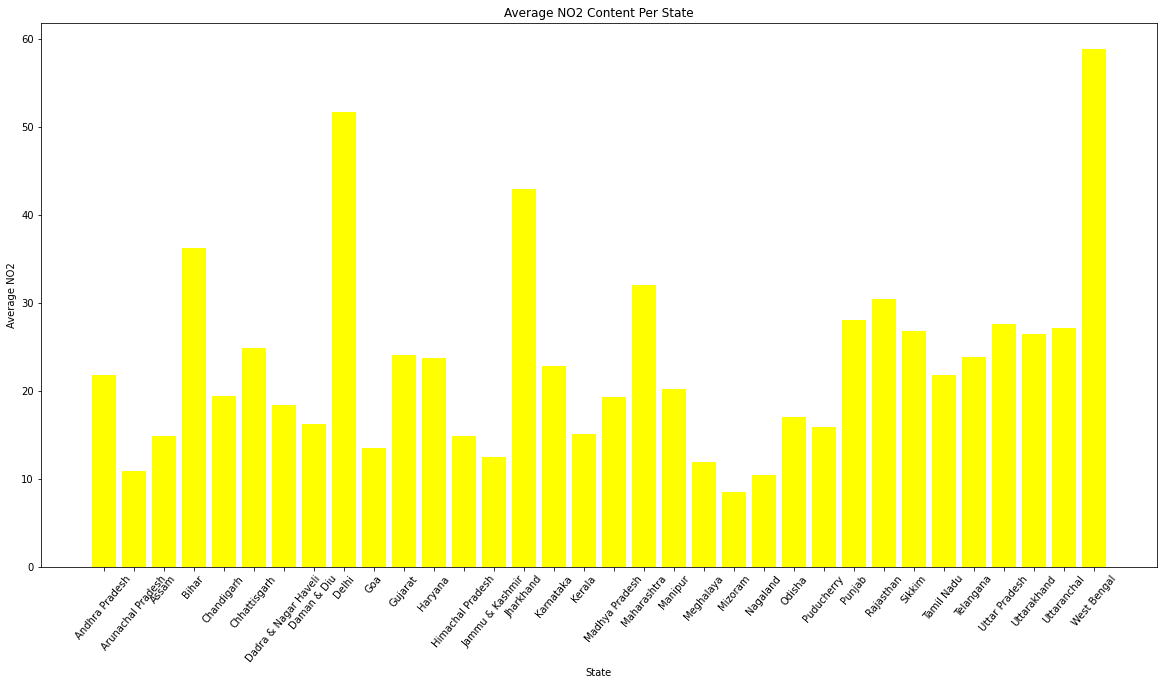

In [25]:
%matplotlib inline 
#in case running errors 

#graphic visualization with values sorted in ascending order 
#(a) as table 
table2 = india_csv.groupby('state').no2.mean().sort_values() #same as above 
print(table2)

#(b) bar chart
stateno2 = india_csv.groupby(['state'])['no2'].mean()
plt.figure(figsize=(20,10))
plt.xlabel('State')
plt.ylabel('Average NO2')
plt.title('Average NO2 Content Per State')
plt.bar(stateno2.index, stateno2, color = 'yellow')
plt.xticks(rotation = 50)
plt.show()

##Observation: 



1.   There are two states that have super high level of nitrogen dioxide content in the air: West Bengal and Delhi (one of the most famous state in India).
2.   The state that have the lowest level of nitrogen dioxide content is Mizoram as well.
3.   The general level of nitrogen dioxide in the air for each state in India is range from 10 μg/m3 to 30 μg/m3 that is comparatively higher than the general level of sulphur dioxide. 





### rspm status

In [26]:
#group data based on states 
    #median for rspm 
    #sort it 
    #states with higher and lower level rspm
india_csv.groupby('state').rspm.mean().sort_values() 
india_csv.groupby('state').rspm.mean().sort_values(ascending = False)

state
Delhi                   177.293754
Uttar Pradesh           170.096793
Jharkhand               167.607692
Punjab                  163.842797
Uttarakhand             148.078133
Haryana                 143.898361
Rajasthan               138.599772
Chhattisgarh            124.068985
Uttaranchal             120.791796
Bihar                   117.547152
Jammu & Kashmir         117.235577
West Bengal             114.717176
Madhya Pradesh          113.818101
Maharashtra             102.082137
Gujarat                  99.342729
Chandigarh               97.130388
Himachal Pradesh         95.034445
Assam                    93.941847
Daman & Diu              89.137788
Dadra & Nagar Haveli     86.520956
Telangana                85.054969
Odisha                   84.855968
Nagaland                 83.367370
Karnataka                80.860261
Andhra Pradesh           79.507964
Arunachal Pradesh        76.987034
Meghalaya                70.456893
Tamil Nadu               70.287956
Manipur       

state
Sikkim                   32.000000
Mizoram                  42.840327
Kerala                   55.451298
Puducherry               56.432061
Goa                      63.752619
Manipur                  69.815789
Tamil Nadu               70.287956
Meghalaya                70.456893
Arunachal Pradesh        76.987034
Andhra Pradesh           79.507964
Karnataka                80.860261
Nagaland                 83.367370
Odisha                   84.855968
Telangana                85.054969
Dadra & Nagar Haveli     86.520956
Daman & Diu              89.137788
Assam                    93.941847
Himachal Pradesh         95.034445
Chandigarh               97.130388
Gujarat                  99.342729
Maharashtra             102.082137
Madhya Pradesh          113.818101
West Bengal             114.717176
Jammu & Kashmir         117.235577
Bihar                   117.547152
Uttaranchal             120.791796
Chhattisgarh            124.068985
Rajasthan               138.599772
Haryana       

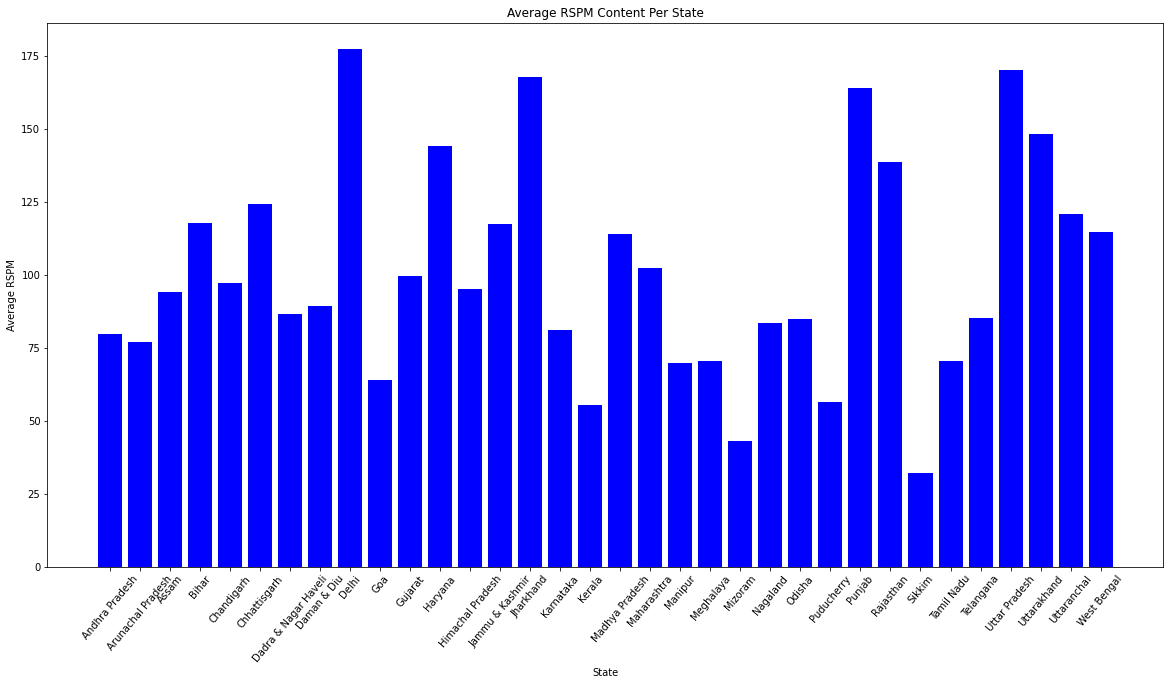

In [27]:
%matplotlib inline 
#in case running errors 

#graphic visualization with values sorted in ascending order 
#(a) as table 
table3 = india_csv.groupby('state').rspm.mean().sort_values() #same as above 
print(table3)

#(b) bar chart
staterspm = india_csv.groupby(['state'])['rspm'].mean()
plt.figure(figsize=(20,10))
plt.xlabel('State')
plt.ylabel('Average RSPM')
plt.title('Average RSPM Content Per State')
plt.bar(staterspm.index, staterspm, color = 'blue')
plt.xticks(rotation = 50)
plt.show()

##Observation: 



1.   There are four states that have super high level of Respirable Suspended Particulate Matter content in the air: Delhi, Jharkhand, Punjab, and Uttar Pradesh.
2.   The state that have the lowest level of Respirable Suspended Particulate Matter content is Sikkim. 
3.   The general level of Respirable Suspended Particulate Matter in the air for each state in India is range from 50 μg/m3 to 125 μg/m3, and is comparatively higher than the general level of nitrogen dioxide. 




### spm status

In [28]:
#group data based on states 
    #median for spm
    #sort it 
    #states with higher and lower level spm
india_csv.groupby('state').spm.mean().sort_values() 
india_csv.groupby('state').spm.mean().sort_values(ascending = False)

state
Delhi                   334.814468
Uttar Pradesh           298.972557
Uttaranchal             282.238307
Rajasthan               270.046908
Bihar                   264.703658
Jharkhand               246.335689
Haryana                 245.634816
West Bengal             228.150079
Uttarakhand             226.483025
Chhattisgarh            226.072782
Punjab                  224.255881
Telangana               220.783480
Arunachal Pradesh       220.783480
Jammu & Kashmir         218.973215
Himachal Pradesh        216.232728
Maharashtra             215.037305
Madhya Pradesh          214.318952
Chandigarh              212.225380
Andhra Pradesh          211.607704
Gujarat                 201.689507
Assam                   200.253103
Karnataka               197.784357
Odisha                  190.696436
Meghalaya               190.470766
Dadra & Nagar Haveli    187.344003
Mizoram                 186.861018
Tamil Nadu              177.265561
Nagaland                176.425962
Daman & Diu   

state
Sikkim                   75.000000
Goa                     139.590582
Puducherry              153.246263
Manipur                 158.657895
Kerala                  162.577449
Daman & Diu             166.521758
Nagaland                176.425962
Tamil Nadu              177.265561
Mizoram                 186.861018
Dadra & Nagar Haveli    187.344003
Meghalaya               190.470766
Odisha                  190.696436
Karnataka               197.784357
Assam                   200.253103
Gujarat                 201.689507
Andhra Pradesh          211.607704
Chandigarh              212.225380
Madhya Pradesh          214.318952
Maharashtra             215.037305
Himachal Pradesh        216.232728
Jammu & Kashmir         218.973215
Arunachal Pradesh       220.783480
Telangana               220.783480
Punjab                  224.255881
Chhattisgarh            226.072782
Uttarakhand             226.483025
West Bengal             228.150079
Haryana                 245.634816
Jharkhand     

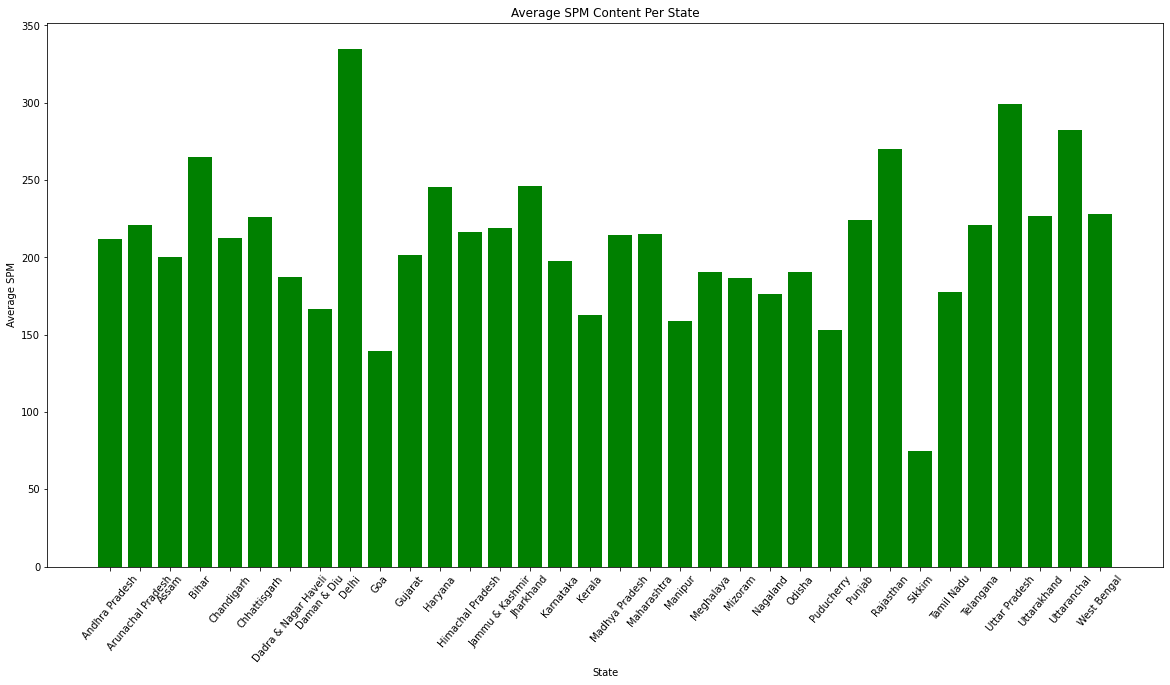

In [29]:
%matplotlib inline 
#in case running errors 

#graphic visualization with values sorted in ascending order 
#(a) as table 
table4 = india_csv.groupby('state').spm.mean().sort_values() #same as above 
print(table4)

#(b) bar chart
statespm = india_csv.groupby(['state'])['spm'].mean()
plt.figure(figsize=(20,10))
plt.xlabel('State')
plt.ylabel('Average SPM')
plt.title('Average SPM Content Per State')
plt.bar(statespm.index, statespm, color = 'green')
plt.xticks(rotation = 50)
plt.show()

##Observation: 



1.   There is one states that have super high level of Suspended Particulate Matter content in the air and it is Delhi.
2.   The state that have the lowest level of Suspended Particulate Matter content is Sikkim. 
3.   The general level of Suspended Particulate Matter in the air for each state in India is range from 150 μg/m3 to 240 μg/m3, that is the highest genearl level among all four parameters comparatively.






### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [30]:
#create a new df regarding 'Andhra Pradesh'
apstate = india_csv.loc[india_csv.state == 'Andhra Pradesh']

apstate = apstate.groupby('year')[['so2', 'no2', 'rspm', 'spm']]
apstate.head()
#apstate.describe()
#apstate.nlargest(5)

#Another direction: 
apstate = india_csv.loc[india_csv.state == 'Andhra Pradesh']
#since there could be too many records for a single year, 
    #so I assume using the average value per year will be better
apstate = apstate.groupby('year')[['so2', 'no2', 'rspm', 'spm']].mean()
apstate.head()


,so2,no2,rspm,spm
year,,,,
1990,8.868966,15.296552,108.833091,165.469596
1991,10.811111,18.827778,108.833091,154.466208
1992,19.766194,36.012866,108.833091,210.643678
1993,8.544444,15.961111,108.833091,220.783480
1994,10.760317,18.273016,108.833091,177.965950


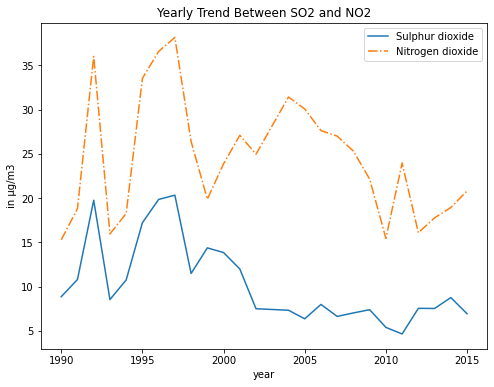

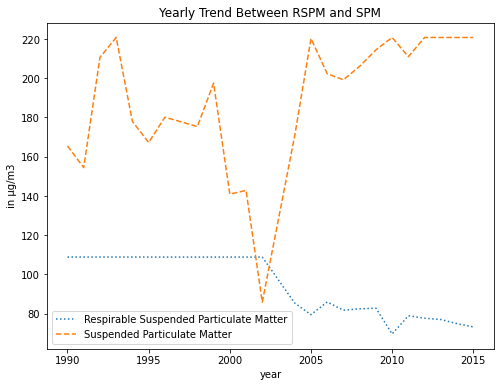

In [31]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

#(a) so2 and no2 
plt.figure(figsize=(8,6))
plt.plot(apstate.index, 
         apstate['so2'], 
         linestyle = '-', 
         label = 'Sulphur dioxide')
plt.plot(apstate.index, 
         apstate['no2'], 
         linestyle = '-.', 
         label = 'Nitrogen dioxide')
plt.xlabel('year')
plt.ylabel('in μg/m3')
plt.title('Yearly Trend Between SO2 and NO2')
plt.legend(loc= 'upper right')

#(b) rspm and spm
plt.figure(figsize=(8,6))
plt.plot(apstate.index, 
         apstate['rspm'], 
         linestyle = ':', 
         label = 'Respirable Suspended Particulate Matter')
plt.plot(apstate.index, 
         apstate['spm'], 
         linestyle = '--', 
         label = 'Suspended Particulate Matter')
plt.xlabel('year')
plt.ylabel('in μg/m3')
plt.title('Yearly Trend Between RSPM and SPM')
plt.legend(loc= 'best')
plt.show()


Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. 

Yes, according to my analysis above, in regard to the State of Andhra Pradesh, I find that the conditions related to the content of sulphur dioxide and respirable suspended particulate matter are positively becoming better and better over the years. However, the content level of nitrogen dioxide is continue to be very unstable. In addition, the suspended particulate matter in the air has an unpleasant trend of continue to grow since the year of 2005. That may lead to an unavoidable increase of the suspended particulate matter in the future. 


Particulate matter is the sum of all solid and liquid particles suspended in air many of which are hazardous. This complex mixture includes both organic and inorganic particles, such as dust, pollen, soot, smoke, and liquid droplets. Located in the South of India, near ocean, the State of Andra Pradesh is benefited from being the major rice producer of India. But it may also be the major reason for the growth of SPM here. The pollutants include suspended particulate matter largely emitted from rice husk and straw combustion. Therefore, I recommend the local government of Andra Pradesh to pay attention on the producing and recyling process of their rice planting. 